In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import warnings
from sklearn import preprocessing
from tqdm import tqdm
import math
from dataclasses import dataclass
from zipfile import ZipFile
from io import BytesIO
import requests
import collections
from scipy.stats import norm
from math import sqrt
from math import pi
from math import exp
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelBinarizer
warnings.filterwarnings("ignore")

# Exploratory Data Analysis

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00602/DryBeanDataset.zip"
with ZipFile(BytesIO(requests.get(url).content), "r") as myzip:
    with myzip.open("DryBeanDataset/Dry_Bean_Dataset.xlsx", "r") as file:
        df = pd.read_excel(file)
df.head(5)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [3]:
df.shape

(13611, 17)

In [4]:
df.isnull().sum(axis = 0).values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

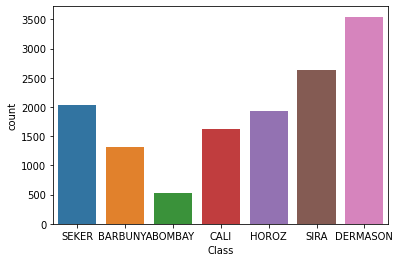

In [5]:
sns.countplot(df['Class'])

In [6]:
df['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

In [7]:
label_encoder = preprocessing.LabelEncoder()
df['Class']= label_encoder.fit_transform(df['Class'])
df['Area'] = df['Area'].astype(float)
df['ConvexArea'] = df['ConvexArea'].astype(float)
df_train, df_test_val = train_test_split (df, test_size= 0.30, random_state=42)
df_test, df_val = train_test_split (df_test_val, test_size= 0.50, random_state=42)

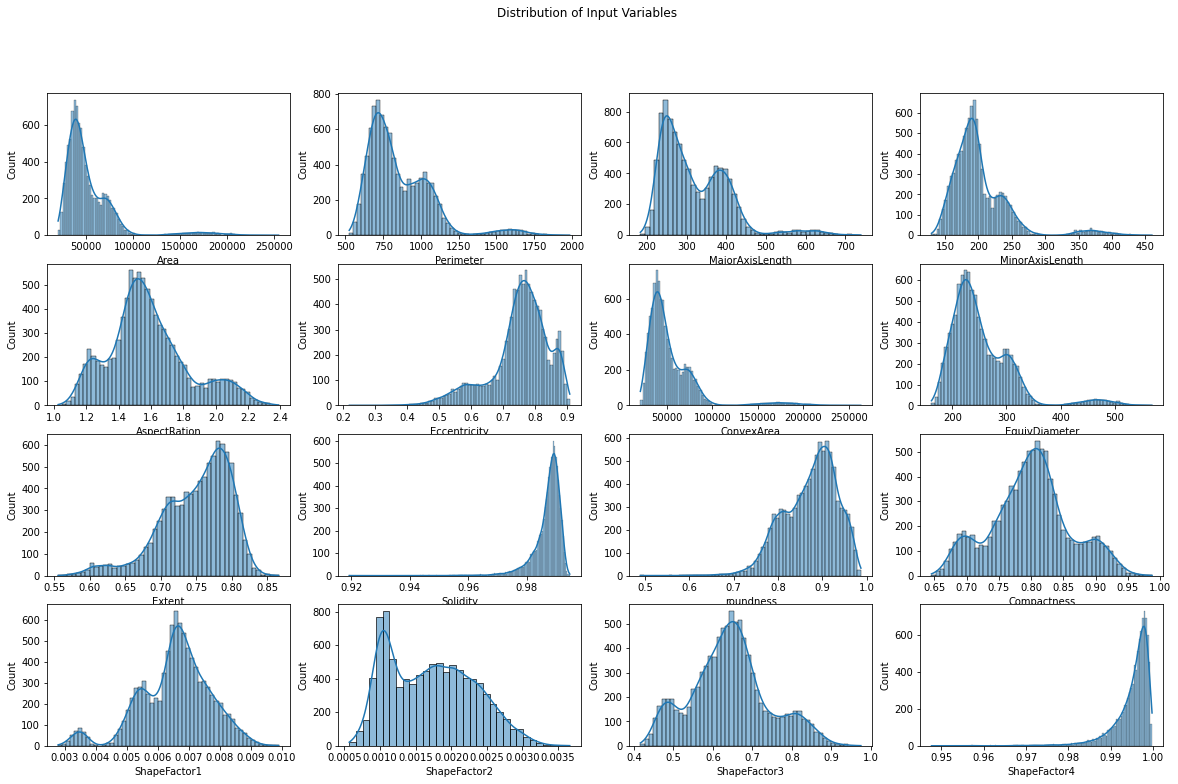

In [8]:
fig, axes = plt.subplots(4,4,figsize=(20, 12))
fig.suptitle('Distribution of Input Variables')
cols = list(df_train.columns.values)
cols.remove('Class')
i=0
for x in range(0,4):
        for y in range (0,4):
            sns.histplot(df_train[cols[i]],ax=axes[x,y],kde=True)
            i+=1

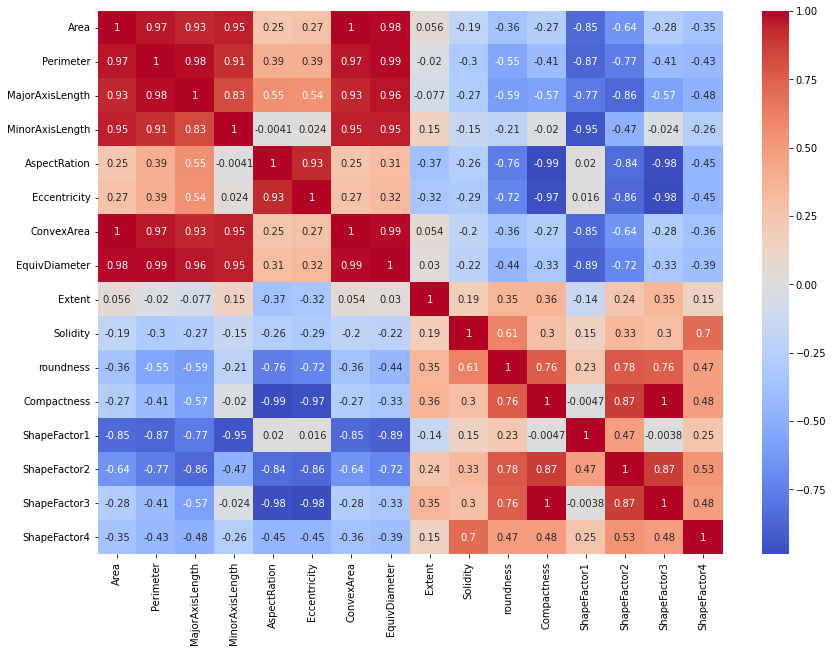

In [ ]:
plt.figure(figsize=(14,10))
corr = df_train.drop(['Class'],axis=1).corr()
map = sns.heatmap(corr, cmap='coolwarm', annot=True)

Positively Correlated (>95%)

|Var 1|Var 2|Correlation Coefficent|
|--|--|--|
|area | convex area| 1.00|
|compactness | shape factor 3 | 1.00
|equivalent diameter | perimeter | 0.99
|equivalent diameter | convex area | 0.99
|major axis length | perimeter | 0.98
|area | perimeter | 0.97
|convex area | perimeter | 0.97
|major axis length | equivalent diameter | 0.96
|minor axis length | equivalent diameter | 0.95
|minor axis length | convex area | 0.95

Negatively Correlated (>95%)

|Var 1|Var 2| Correlation Coefficient|
|--|--|--|
aspect ration | compactness | -0.99
eccentricity | shape factor 3 | -0.98
aspect ration | shape factor 3 | -0.98
eccentricity | compactness | -0.97
minor axis length | shape factor 1 | -0.95



In [ ]:
sns.pairplot(df_train, hue="Class")

In [ ]:
fig, axes = plt.subplots(8, 2, figsize = (20, 40))
for feature, ax in zip(df_train.iloc[:,:-1], axes.flatten()):
    sns.violinplot(data=df_train,x="Class",y=feature,inner="quartile",ax=ax)
    ax.set(xlabel=None)
plt.show()

# Data Preparation

In [9]:
X_train = df_train.iloc[:,:-1]
y_train = df_train.iloc[:,-1]

In [10]:
X_test = df_test.iloc[:,:-1]
y_test = df_test.iloc[:,-1]

In [11]:
X_val = df_val.iloc[:,:-1]
y_val = df_val.iloc[:,-1]

#Feature Engineering

In [ ]:
# Feature Selection
k_best = SelectKBest(score_func=chi2, k='all')
k_best.fit(X_train,y_train)
k_best.transform(X_train)
k_best = pd.DataFrame(data={'X':list(X_train.columns),'Score':k_best.scores_})
k_best = k_best.sort_values('Score',ascending = False)
fig, ax = plt.subplots(figsize=(10,5))
ax.set(yscale="log")
plt.xticks(rotation=45)
plt.title('Chi square Score (In log10) of Input Variables')
sns.barplot(data = k_best,x='X',y='Score',ax=ax)

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
plt.xticks(rotation=45)
plt.title('Chi square Score of Input Variables')
sns.barplot(data = k_best,x='X',y='Score',ax=ax)

In [ ]:
k_best

In [ ]:
from sklearn.feature_selection import mutual_info_classif

k_best = SelectKBest(score_func=mutual_info_classif, k='all')
k_best = k_best.fit(X_train,y_train)
k_best.transform(X_train)
k_best = pd.DataFrame(data={'X':list(X_train.columns),'Score':k_best.scores_})
k_best = k_best.sort_values('Score',ascending = False)
fig, ax = plt.subplots(figsize=(10,5))
plt.xticks(rotation=45)
plt.title('Mutual Info Score of Input Variables')
sns.barplot(data = k_best,x='X',y='Score',ax=ax)

In [ ]:
k_best

# Standardization

In [12]:
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, index = X_train.index)
X_train_scaled.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
11380,-0.778804,-0.952033,-0.761778,-1.132158,0.402367,0.579744,-0.781309,-0.961486,0.797865,0.670538,0.373621,-0.486010,1.655928,0.186700,-0.514044,0.481140
10592,-0.888682,-1.174697,-1.292427,-0.829472,-1.280982,-1.486357,-0.886073,-1.143089,-0.502715,-0.366983,0.980384,1.400608,1.051761,2.067855,1.433779,0.109085
3130,0.902889,1.235788,1.051213,1.027888,0.280549,0.491513,0.906092,1.100285,-0.870077,-0.475248,-1.293303,-0.398062,-1.243848,-0.949598,-0.429321,-0.416357


In [13]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, index = X_test.index)
X_test_scaled.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
6281,-0.031052,0.188200,0.520685,-0.430078,1.669458,1.245563,-0.039634,0.077577,1.594078,0.917345,-0.948625,-1.520198,0.384799,-1.078719,-1.465729,-0.122222
3834,5.303237,4.267472,4.125995,4.431370,0.397652,0.576433,5.337902,4.429434,-1.420174,-1.390878,-0.623405,-0.580391,-2.952461,-1.739183,-0.604304,-3.088080
134,-0.663742,-0.921442,-1.147144,-0.205839,-1.765105,-2.824489,-0.668381,-0.781419,0.526288,0.951912,1.720765,2.158815,0.031795,2.294885,2.293628,1.017474


In [14]:
X_val_scaled = scaler.transform(X_val)
X_val_scaled = pd.DataFrame(X_val_scaled, index = X_val.index)
X_val_scaled.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
2924,0.712505,1.058998,0.902735,0.778808,0.378548,0.562933,0.704360,0.908208,1.109703,0.472269,-1.345757,-0.458778,-1.051255,-0.906893,-0.487874,0.676730
7030,0.225511,0.808602,1.185316,-0.472997,3.035550,1.660860,0.223316,0.380960,-3.413659,0.078226,-2.766487,-2.379110,0.450475,-1.547188,-2.193650,-0.109593
6870,0.158718,0.444080,0.818631,-0.295975,1.961159,1.353219,0.154269,0.303914,-1.594834,0.338532,-1.186796,-1.714026,0.179567,-1.253230,-1.634950,0.164676


In [15]:
print('Size of Train = {}, Test = {}, Val = {}'.format(X_train_scaled.shape,
                                                       X_test_scaled.shape, 
                                                       X_val_scaled.shape))

Size of Train = (9527, 16), Test = (2042, 16), Val = (2042, 16)


# Principal Component Analysis

In [16]:
class PCA:
    def __init__(self, num_components):
        self.num_components = num_components
        self.eigenvector_subset = None

    def fit(self, X):    
        X = X - np.mean(X , axis = 0)
        cov_mat = np.cov(X.transpose())
        eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)
        sorted_index = np.argsort(eigen_values)[::-1]
        sorted_eigenvalue = eigen_values[sorted_index]
        eigenvalue_subset = sorted_eigenvalue[0:self.num_components]
        sorted_eigenvectors = eigen_vectors[:,sorted_index]
        self.eigenvector_subset = sorted_eigenvectors[:,0:self.num_components]
        return sorted_eigenvalue

    def transform(self, X):
        X_reduced = np.dot(self.eigenvector_subset.transpose() , X.transpose()).transpose()
        return X_reduced

In [17]:
pca = PCA(4)
val_capture = pca.fit(X_train_scaled)

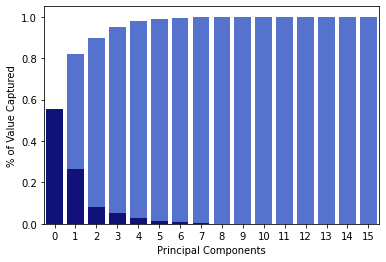

In [18]:
cum_sum_eigenvalues = np.cumsum(val_capture)
pc=pd.DataFrame({
    'PC':[i for i in range(0,16)],
    'Individual':[i/val_capture.sum() for i in val_capture],
    'Cumulative':[i/val_capture.sum() for i in cum_sum_eigenvalues]
})
ax=plt.subplots()
ax=sns.barplot(x=pc["PC"],y=pc["Cumulative"],color = 'royalblue')
ax=sns.barplot(x=pc["PC"],y=pc["Individual"],color = 'darkblue')
ax.set(xlabel="Principal Components", ylabel="% of Value Captured")
plt.show()

In [19]:
print('Explained variance for Principal Components: ')
pc['Individual']*100

Explained variance for Principal Components: 


0     55.522633
1     26.315241
2      8.077521
3      5.100401
4      2.744421
5      1.151636
6      0.695432
7      0.323748
8      0.050716
9      0.009030
10     0.006292
11     0.001902
12     0.000939
13     0.000064
14     0.000013
15     0.000011
Name: Individual, dtype: float64

In [20]:
X_train_pca = pca.transform(X_train_scaled)
X_train_pca

array([[ 1.82877329, -2.02695921,  1.02036564,  1.14633798],
       [ 4.20853095,  0.50081902, -1.45953189, -0.74108304],
       [-3.28107753,  0.57422663, -0.2844755 , -0.92132267],
       ...,
       [-3.92649952,  0.9158983 ,  1.57747363,  0.67523033],
       [ 3.45733668,  2.14727487, -0.1245978 , -0.63707788],
       [-3.19381563, -2.25709361,  0.65946988, -1.88956715]])

In [21]:
X_test_pca = pca.transform(X_test_scaled)
X_test_pca

array([[ -1.80509178,  -2.02012821,   1.70342287,   2.03804883],
       [-10.80342683,   5.43656579,  -1.24838723,  -1.55701491],
       [  4.96379138,   3.0684187 ,  -0.34030203,  -0.47087792],
       ...,
       [  0.46009455,  -0.12380066,   1.37659265,   0.50407119],
       [  2.08356772,  -1.15188084,   0.1037609 ,  -0.6235566 ],
       [ -1.40018773,   0.2834631 ,   1.22726203,  -0.83048416]])

In [22]:
X_val_pca = pca.transform(X_val_scaled)
X_val_pca

array([[-2.50863369,  0.79181304,  1.15127399,  0.74933206],
       [-4.22819662, -4.44584226,  1.08459696, -2.55216728],
       [-2.74258717, -2.75466974,  1.32991483, -1.0144931 ],
       ...,
       [ 2.74531397,  0.16990608, -0.47578592,  0.1552357 ],
       [-3.87177462, -0.8290878 , -2.70961718, -0.12611083],
       [-0.16522903, -0.40740382,  0.38146034,  0.96813238]])

In [23]:
print('Size of Train = {}, Test = {}, Val = {}'.format(X_train_pca.shape,
                                                       X_test_pca.shape, 
                                                       X_val_pca.shape))

Size of Train = (9527, 4), Test = (2042, 4), Val = (2042, 4)


In [24]:
def evaluate(y, y_hat):
  y = (y==1)
  y_hat= (y_hat==1)
  accuracy = (y == y_hat).sum()/y.size
  precision = (y & y_hat).sum()/ y_hat.sum()
  recall= (y & y_hat).sum()/ y.sum()
  f_score = 2 * precision * recall / (precision + recall)

  return round(accuracy,2), round(f_score,2), round(precision,2), round(recall,2)

# Models

## Logistic Regression

In [75]:
class LogisticRegression:

  def __init__(self,learningRate, tolerance, X_train, X_test, y_train, y_test, maxIteration=1000):
    self.learningRate=learningRate
    self.tolerance=tolerance
    self.maxIteration=maxIteration
    self.X_train, self.X_test, self.y_train, self.y_test = X_train,X_test,y_train,y_test
    
  def addX0(self, X):
    return np.column_stack([np.ones([X.shape[0], 1]), X])
    
  def sigmoid(self, z):
    sig = 1/(1 + np.exp(-z))
    return sig
    
  def costFunction(self, X, y):
    pred= np.log(np.ones(X.shape[0]) + np.exp(X.dot(self.w))) - X.dot(self.w)*y
    cost=pred.sum()
    return cost
    
  def gradient(self, X, y):
    sig = self.sigmoid(X.dot(self.w))
    gradient = (sig-y).dot(X)
    
    return gradient
  
  def gradientDescent(self, X, y):
    error_sequence=[]
    last=float('inf')
    
    for i in tqdm(range(self.maxIteration)):
        self.w= self.w - self.learningRate * self.gradient(X, y)
        current = self.costFunction(X, y) 
        diff= abs(last - current)
        last_cost=current
        error_sequence.append(current)
        
        if diff < self.tolerance:
            print("The model stopped learning")
            break
    self.plot_cost(error_sequence)

  def plot_cost(self, cost_sequence) :
    s = np.array (cost_sequence)
    t = np.arange (s.size)
    fig, ax = plt.subplots()
    ax.plot (t,s)
    ax.set(xlabel = 'iterations', ylabel = 'cost' , title = 'Cost Trend')
    ax.grid()
    plt.legend(bbox_to_anchor=(1.05,1), loc=2, shadow=True)
    plt.show() 
    
  def predict(self, X):
    sig = self.sigmoid(X.dot(self.w))
    return np.round(sig)

  def predict_proba(self, X):
    sig = self.sigmoid(X.dot(self.w))
    return np.round(sig,2)
  
  def fit(self):
    self.w = np.ones(self.X_train.shape[1], dtype=np.float64)*0
    self.gradientDescent(self.X_train, self.y_train)
    y_hat_train = self.predict(self.X_train)
    accuracy, f_score, precision, recall = evaluate(self.y_train, y_hat_train)
    
    print("Accuracy = {} f-Score = {} Precision = {} Recall = {}".format(accuracy, 
                                                    f_score, precision, recall))

In [76]:
def transform_data(df,classes,var):
    copy_df = df.copy()
    copy_df.replace(var,'pos',inplace=True)
    classes.remove(var)
    copy_df.replace(to_replace = classes,value='neg',inplace=True)
    copy_df.replace('pos',1,inplace=True)
    copy_df.replace('neg',0,inplace=True)
    return copy_df

### With PCA

100%|██████████| 1000/1000 [00:03<00:00, 319.91it/s]


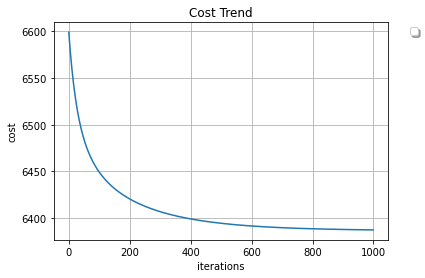

Accuracy = 0.7 f-Score = 0.38 Precision = 0.24 Recall = 0.96


100%|██████████| 1000/1000 [00:02<00:00, 354.80it/s]


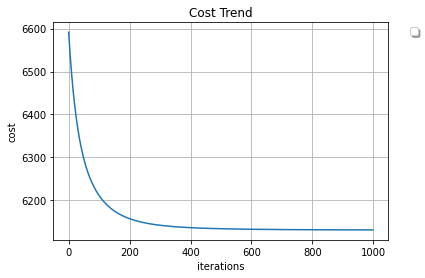

Accuracy = 0.66 f-Score = 0.18 Precision = 0.1 Recall = 1.0


100%|██████████| 1000/1000 [00:02<00:00, 361.88it/s]


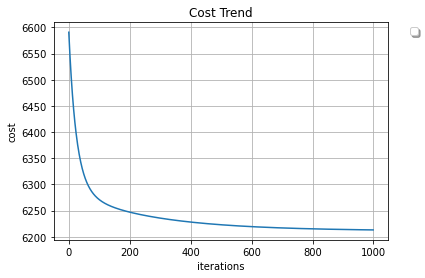

Accuracy = 0.7 f-Score = 0.45 Precision = 0.29 Recall = 0.99


100%|██████████| 1000/1000 [00:02<00:00, 335.51it/s]


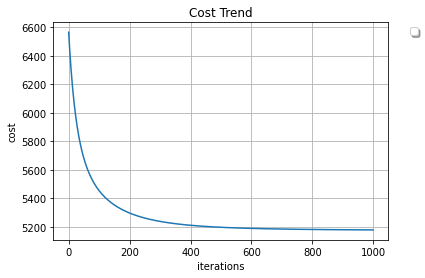

Accuracy = 0.63 f-Score = 0.58 Precision = 0.41 Recall = 1.0


100%|██████████| 1000/1000 [00:02<00:00, 386.33it/s]


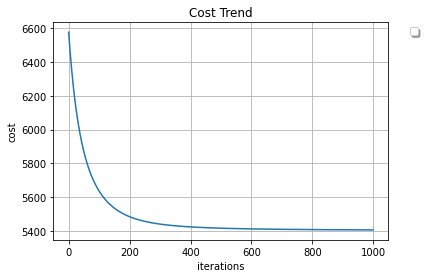

Accuracy = 0.64 f-Score = 0.44 Precision = 0.28 Recall = 1.0


100%|██████████| 1000/1000 [00:02<00:00, 389.16it/s]


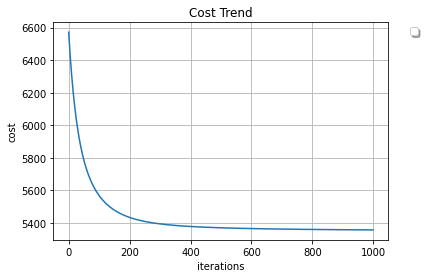

Accuracy = 0.64 f-Score = 0.45 Precision = 0.29 Recall = 1.0


100%|██████████| 1000/1000 [00:02<00:00, 414.95it/s]


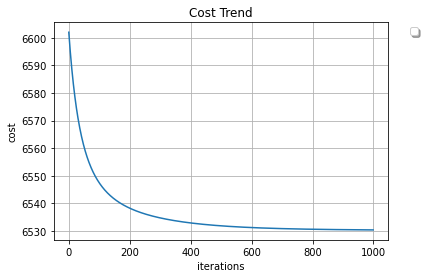

Accuracy = 0.54 f-Score = 0.41 Precision = 0.27 Recall = 0.81


In [104]:
lrs_pca=[]
for i in range(0,7):
    lr = LogisticRegression (tolerance = 1e-4, learningRate = 0.1e-5, maxIteration = 1000, 
                             X_train=X_train_pca,y_train=transform_data(y_train,[0,1,2,3,4,5,6],i),
                             X_test=X_test_pca,y_test=transform_data(y_test,[0,1,2,3,4,5,6],i))
    lr.fit()
    lrs_pca.append(lr)

In [105]:
d = []
for i in range(X_train_pca.shape[0]):
  row = []
  for lr in lrs_pca:
    row.append(lr.predict_proba(X_train_pca[i]))
  d.append(row)
lr_pca = pd.DataFrame(data = d)
print('Train Accuracy: {}%'.format(round(accuracy_score(
            y_train,lr_pca.idxmax(axis=1).values)*100,2)))
d2 = []
for i in range(X_test_pca.shape[0]):
  row = []
  for lr in lrs_pca:
    row.append(lr.predict_proba(X_test_pca[i]))
  d2.append(row)
lr_test_pca = pd.DataFrame(data = d2)
print('Test Accuracy: {}%'.format(round(accuracy_score(
            y_test,lr_test_pca.idxmax(axis=1).values)*100,2)))

Train Accuracy: 62.98%
Test Accuracy: 61.9%


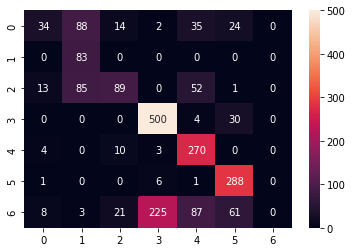

In [106]:
cm = confusion_matrix(y_test, lr_test_pca.idxmax(axis=1).values)
sns.heatmap(pd.DataFrame(cm), annot=True ,fmt='g')

In [107]:
target_name = ['0','1','2','3','4','5','6']
print(classification_report(y_test, lr_test_pca.idxmax(axis=1).values, target_names=target_name))

              precision    recall  f1-score   support

           0       0.57      0.17      0.26       197
           1       0.32      1.00      0.49        83
           2       0.66      0.37      0.48       240
           3       0.68      0.94      0.79       534
           4       0.60      0.94      0.73       287
           5       0.71      0.97      0.82       296
           6       0.00      0.00      0.00       405

    accuracy                           0.62      2042
   macro avg       0.51      0.63      0.51      2042
weighted avg       0.51      0.62      0.53      2042



### Without PCA

100%|██████████| 1000/1000 [00:02<00:00, 350.41it/s]


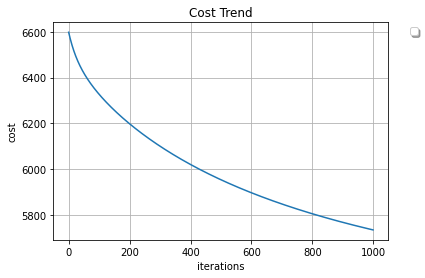

Accuracy = 0.74 f-Score = 0.42 Precision = 0.27 Recall = 0.99


100%|██████████| 1000/1000 [00:02<00:00, 349.93it/s]


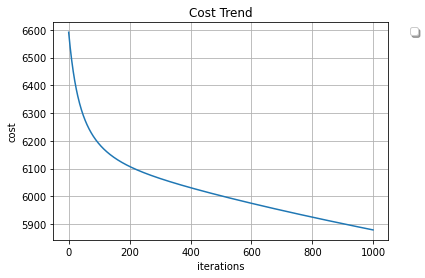

Accuracy = 0.74 f-Score = 0.23 Precision = 0.13 Recall = 1.0


100%|██████████| 1000/1000 [00:03<00:00, 320.24it/s]


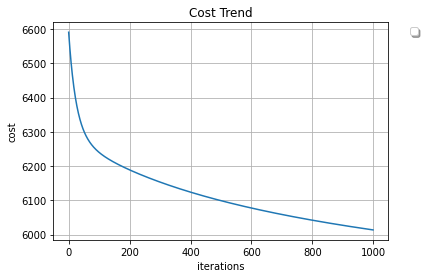

Accuracy = 0.7 f-Score = 0.45 Precision = 0.29 Recall = 1.0


100%|██████████| 1000/1000 [00:02<00:00, 338.38it/s]


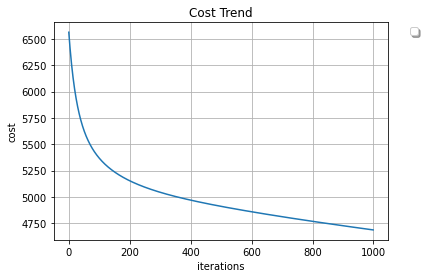

Accuracy = 0.69 f-Score = 0.63 Precision = 0.45 Recall = 1.0


100%|██████████| 1000/1000 [00:02<00:00, 383.12it/s]


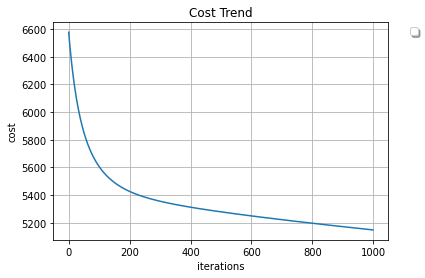

Accuracy = 0.69 f-Score = 0.47 Precision = 0.31 Recall = 1.0


100%|██████████| 1000/1000 [00:03<00:00, 329.23it/s]


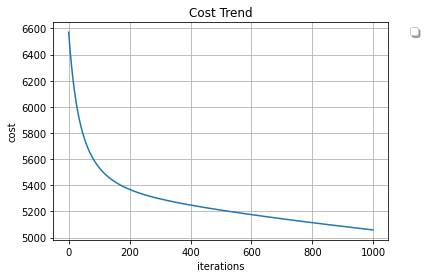

Accuracy = 0.7 f-Score = 0.49 Precision = 0.33 Recall = 0.99


100%|██████████| 1000/1000 [00:02<00:00, 384.09it/s]


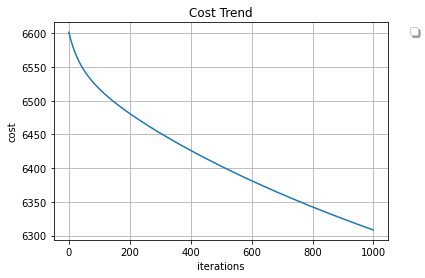

Accuracy = 0.56 f-Score = 0.46 Precision = 0.3 Recall = 0.98


In [108]:
lrs_without_pca=[]
for i in range(0,7):
    lr = LogisticRegression (tolerance = 1e-4, learningRate = 0.1e-5, maxIteration = 1000, 
                             X_train=X_train_scaled,y_train=transform_data(y_train,[0,1,2,3,4,5,6],i),
                             X_test=X_test_scaled,y_test=transform_data(y_test,[0,1,2,3,4,5,6],i))
    lr.fit()
    lrs_without_pca.append(lr)

In [109]:
X_train_scaled = np.array(X_train_scaled)
X_test_scaled = np.array(X_test_scaled)
d3 = []
for i in range(X_train_scaled.shape[0]):
  row = []
  for lr in lrs_without_pca:
    row.append(lr.predict_proba(X_train_scaled[i]))
  d3.append(row)
lr_without_pca = pd.DataFrame(data = d3)
print('Train Accuracy: {}%'.format(round(accuracy_score(
            y_train,lr_without_pca.idxmax(axis=1).values)*100,2)))
d4 = []
for i in range(X_test_pca.shape[0]):
  row = []
  for lr in lrs_without_pca:
    row.append(lr.predict_proba(X_test_scaled[i]))
  d4.append(row)
lr_test_without_pca = pd.DataFrame(data = d4)
print('Test Accuracy: {}%'.format(round(accuracy_score(
            y_test,lr_test_without_pca.idxmax(axis=1).values)*100,2)))

Train Accuracy: 73.2%
Test Accuracy: 73.51%


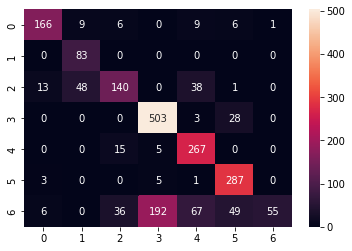

In [110]:
cm = confusion_matrix(y_test, lr_test_without_pca.idxmax(axis=1).values)
sns.heatmap(pd.DataFrame(cm), annot=True ,fmt='g')

In [111]:
print(classification_report(y_test, lr_test_without_pca.idxmax(axis=1).values, target_names=target_name))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       197
           1       0.59      1.00      0.74        83
           2       0.71      0.58      0.64       240
           3       0.71      0.94      0.81       534
           4       0.69      0.93      0.79       287
           5       0.77      0.97      0.86       296
           6       0.98      0.14      0.24       405

    accuracy                           0.74      2042
   macro avg       0.76      0.77      0.71      2042
weighted avg       0.78      0.74      0.68      2042



## Neural Network

In [97]:
class NeuralNetwork:

  def __init__(self,epochs,batch_size,X,y,X_val=pd.DataFrame(),y_val=[]):
    self.epochs = epochs
    self.batch_size = batch_size
    self.model = None
    self.X_train = X
    self.y_train = y
    self.input_dim = X.shape[1]
    self.X_val = X_val
    self.y_val = y_val

  def fit(self):
    num_classes = 7
    self.y_train = tf.keras.utils.to_categorical(self.y_train, num_classes=num_classes)
    self.model = Sequential()
    self.model.add(Dense(4, input_dim=self.input_dim, activation='relu'))
    self.model.add(Dense(4, activation='relu'))
    self.model.add(Dense(7, activation='softmax'))
    self.model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    if not self.X_val.empty:
      self.y_val = tf.keras.utils.to_categorical(self.y_val, num_classes=num_classes)
      history = self.model.fit(self.X_train, self.y_train, epochs=self.epochs,
                             batch_size=self.batch_size, validation_data=[self.X_val,self.y_val])
    else:
      history = self.model.fit(self.X_train, self.y_train, epochs=self.epochs,
                             batch_size=self.batch_size)
    return history

  def predict(self, X_test):
    y_hat = self.model.predict(X_test)
    return y_hat

### With PCA

In [98]:
nn_withpca = NeuralNetwork(epochs = 50, batch_size=100, X=X_train_pca, y=y_train)
history_with_pca = nn_withpca.fit()

Epoch 1/50
96/96 [==============================] - 1s 2ms/step - loss: 1.9232 - accuracy: 0.3127
Epoch 2/50
96/96 [==============================] - 0s 2ms/step - loss: 1.7340 - accuracy: 0.3889
Epoch 3/50
96/96 [==============================] - 0s 2ms/step - loss: 1.5804 - accuracy: 0.3868
Epoch 4/50
96/96 [==============================] - 0s 2ms/step - loss: 1.4574 - accuracy: 0.3998
Epoch 5/50
96/96 [==============================] - 0s 4ms/step - loss: 1.3642 - accuracy: 0.4058
Epoch 6/50
96/96 [==============================] - 0s 5ms/step - loss: 1.2810 - accuracy: 0.4453
Epoch 7/50
96/96 [==============================] - 0s 4ms/step - loss: 1.1937 - accuracy: 0.4878
Epoch 8/50
96/96 [==============================] - 1s 10ms/step - loss: 1.1066 - accuracy: 0.5172
Epoch 9/50
96/96 [==============================] - 0s 4ms/step - loss: 1.0200 - accuracy: 0.5558
Epoch 10/50
96/96 [==============================] - 0s 3ms/step - loss: 0.9315 - accuracy: 0.5975
Epoch 11/50
96/96 

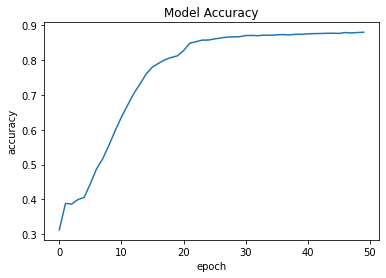

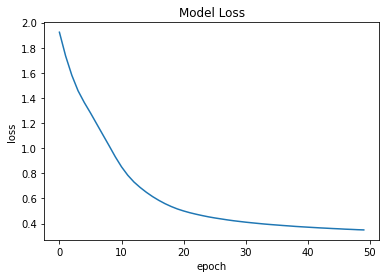

In [99]:
#Plotting model Accuracy
plt.plot(history_with_pca.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

# summarize history for loss
plt.plot(history_with_pca.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [100]:
def calc_y_hat(y_hat):
  y_hat_withpca = []
  for i in range(y_hat.shape[0]):
    y_hat_withpca.append(np.where(y_hat[i] == max(y_hat[i]))[0][0])
  return y_hat_withpca

In [101]:
print('Train Accuracy: {}%'.format(round(accuracy_score(y_train,
                  calc_y_hat(nn_withpca.predict(X_train_pca)))*100,2)))
print('Test Accuracy: {}%'.format(round(accuracy_score(y_test,
                  calc_y_hat(nn_withpca.predict(X_test_pca)))*100,2)))

298/298 [==============================] - 1s 2ms/step
Train Accuracy: 88.03%
64/64 [==============================] - 0s 2ms/step
Test Accuracy: 87.66%


64/64 [==============================] - 0s 3ms/step


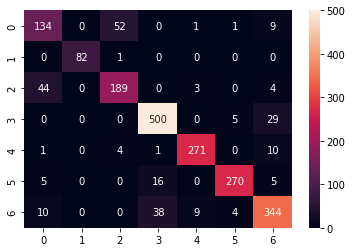

In [102]:
cm = confusion_matrix(y_test, calc_y_hat(nn_withpca.predict(X_test_pca)))
sns.heatmap(pd.DataFrame(cm), annot=True ,fmt='g')

In [103]:
target_name = ['0','1','2','3','4','5','6']
print(classification_report(y_test, calc_y_hat(nn_withpca.predict(X_test_pca)), target_names=target_name))

64/64 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.69      0.68      0.69       197
           1       1.00      0.99      0.99        83
           2       0.77      0.79      0.78       240
           3       0.90      0.94      0.92       534
           4       0.95      0.94      0.95       287
           5       0.96      0.91      0.94       296
           6       0.86      0.85      0.85       405

    accuracy                           0.88      2042
   macro avg       0.88      0.87      0.87      2042
weighted avg       0.88      0.88      0.88      2042



### Without PCA

In [85]:
nn_withoutpca = NeuralNetwork(epochs = 50, batch_size=100, X=X_train_scaled, y=y_train)
history_withoutpca = nn_withoutpca.fit()

Epoch 1/50
96/96 [==============================] - 1s 2ms/step - loss: 1.6766 - accuracy: 0.4750
Epoch 2/50
96/96 [==============================] - 0s 2ms/step - loss: 1.3221 - accuracy: 0.5326
Epoch 3/50
96/96 [==============================] - 0s 2ms/step - loss: 1.0463 - accuracy: 0.5729
Epoch 4/50
96/96 [==============================] - 0s 2ms/step - loss: 0.8274 - accuracy: 0.7042
Epoch 5/50
96/96 [==============================] - 0s 2ms/step - loss: 0.6670 - accuracy: 0.7784
Epoch 6/50
96/96 [==============================] - 0s 2ms/step - loss: 0.5678 - accuracy: 0.8056
Epoch 7/50
96/96 [==============================] - 0s 2ms/step - loss: 0.5080 - accuracy: 0.8341
Epoch 8/50
96/96 [==============================] - 0s 2ms/step - loss: 0.4690 - accuracy: 0.8501
Epoch 9/50
96/96 [==============================] - 0s 2ms/step - loss: 0.4414 - accuracy: 0.8621
Epoch 10/50
96/96 [==============================] - 0s 2ms/step - loss: 0.4201 - accuracy: 0.8744
Epoch 11/50
96/96 [

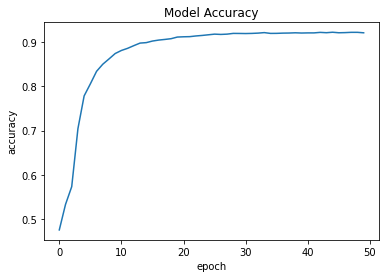

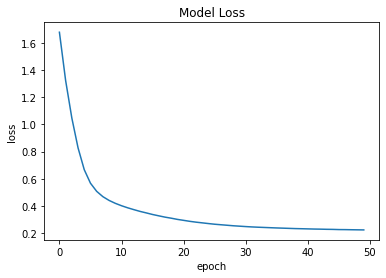

In [86]:
#Plotting model Accuracy
plt.plot(history_withoutpca.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

# summarize history for loss
plt.plot(history_withoutpca.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [87]:
print('Train Accuracy: {}%'.format(round(accuracy_score(y_train,
                  calc_y_hat(nn_withoutpca.predict(X_train_scaled)))*100,2)))
print('Test Accuracy: {}%'.format(round(accuracy_score(y_test,
                  calc_y_hat(nn_withoutpca.predict(X_test_scaled)))*100,2)))

298/298 [==============================] - 1s 2ms/step
Train Accuracy: 92.2%
64/64 [==============================] - 0s 2ms/step
Test Accuracy: 91.92%


64/64 [==============================] - 0s 2ms/step


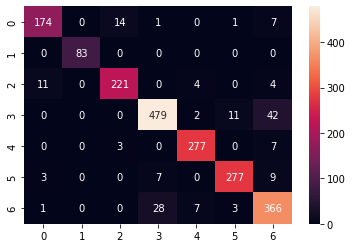

In [88]:
cm = confusion_matrix(y_test, calc_y_hat(nn_withoutpca.predict(X_test_scaled)))
sns.heatmap(pd.DataFrame(cm), annot=True ,fmt='g')

In [89]:
print(classification_report(y_test, calc_y_hat(nn_withoutpca.predict(X_test_scaled)), target_names=target_name))

64/64 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       197
           1       1.00      1.00      1.00        83
           2       0.93      0.92      0.92       240
           3       0.93      0.90      0.91       534
           4       0.96      0.97      0.96       287
           5       0.95      0.94      0.94       296
           6       0.84      0.90      0.87       405

    accuracy                           0.92      2042
   macro avg       0.93      0.93      0.93      2042
weighted avg       0.92      0.92      0.92      2042



##Naive Bayes

In [112]:
class NaiveBayes:

  def __init__(self, num_classes):
    self.num_classes = num_classes
    self.num_components = None

  def fit(self,X,y):
    self.pred = []
    y = self.preprocess_target(y)
    mean_array = []
    var_array = []
    class_count = []
    self.num_components = X.shape[1]
    for j in range(self.num_classes):
      mask = y[:,j].astype(bool)
      X_feature = X[mask]
      mean_array.append(np.mean(X_feature,axis = 0))
      var_array.append(np.var(X_feature,axis = 0))
      class_count.append(sum(mask))

    self.mean_array,self.var_array,self.class_count = mean_array,var_array,class_count

  def preprocess_target(self,y):
    y  = np.array(y)
    lb = LabelBinarizer()
    y = lb.fit_transform(y)
    if y.shape[1] == 1:
        y = np.concatenate((1 - y, y), axis=1)
    return y

  def predict(self,X):
    y_hat = []
    for x in X:
      probs = []
      for i in range(self.num_classes):

          mean = self.mean_array[i]
          var = self.var_array[i]
          
          log_li = -0.5*(np.log(2*np.pi*var))  - 0.5*((x-mean)**2)/var
          prior_prob = np.log(self.class_count[i]/sum(self.class_count))
          probs.append(log_li.sum() + prior_prob)

      out = probs.index(max(probs))
      y_hat.append(out)
    return y_hat

### With PCA

In [113]:
nb_pca = NaiveBayes(num_classes = 7)
nb_pca.fit(np.array(X_train_pca),np.array(y_train))
y_hat = nb_pca.predict(X_train_pca)
y_hat2 = nb_pca.predict(X_test_pca)
print('Train Accuracy: {}%'.format(round(accuracy_score(y_train,y_hat)*100,2)))
print('Test Accuracy: {}%'.format(round(accuracy_score(y_test,y_hat2)*100,2)))

Train Accuracy: 86.43%
Test Accuracy: 87.27%


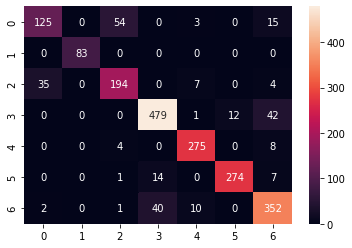

In [114]:
cm = confusion_matrix(y_test,y_hat2)
sns.heatmap(pd.DataFrame(cm), annot=True ,fmt='g')

In [115]:
print(classification_report(y_test, nb_pca.predict(X_test_pca), target_names=target_name))

              precision    recall  f1-score   support

           0       0.77      0.63      0.70       197
           1       1.00      1.00      1.00        83
           2       0.76      0.81      0.79       240
           3       0.90      0.90      0.90       534
           4       0.93      0.96      0.94       287
           5       0.96      0.93      0.94       296
           6       0.82      0.87      0.85       405

    accuracy                           0.87      2042
   macro avg       0.88      0.87      0.87      2042
weighted avg       0.87      0.87      0.87      2042



### Without PCA

In [116]:
nb_without_pca = NaiveBayes(num_classes = 7)
nb_without_pca.fit(np.array(X_train_scaled),np.array(y_train))
y_hat = nb_without_pca.predict(np.array(X_train_scaled))
y_hat2 = nb_without_pca.predict(np.array(X_test_scaled))
print('Train Accuracy: {}%'.format(round(accuracy_score(y_train,y_hat)*100,2)))
print('Test Accuracy: {}%'.format(round(accuracy_score(y_test,y_hat2)*100,2)))

Train Accuracy: 89.55%
Test Accuracy: 89.81%


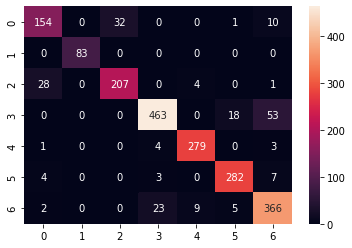

In [117]:
cm = confusion_matrix(y_test,y_hat2)
sns.heatmap(pd.DataFrame(cm), annot=True ,fmt='g')

In [118]:
print(classification_report(y_test, nb_without_pca.predict(np.array(X_test_scaled)), target_names=target_name))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80       197
           1       1.00      1.00      1.00        83
           2       0.87      0.86      0.86       240
           3       0.94      0.87      0.90       534
           4       0.96      0.97      0.96       287
           5       0.92      0.95      0.94       296
           6       0.83      0.90      0.87       405

    accuracy                           0.90      2042
   macro avg       0.90      0.91      0.90      2042
weighted avg       0.90      0.90      0.90      2042



# Model Selection

In [119]:
final_accuracy_with_pca = []

dat = []
for i in range(X_val_pca.shape[0]):
  row = []
  for lr in lrs_pca:
    row.append(lr.predict_proba(X_val_pca[i]))
  dat.append(row)
lr_val_pca = pd.DataFrame(data = dat)
final_accuracy_with_pca.append(round(accuracy_score(y_val,lr_val_pca.idxmax(axis=1).values)*100,2))
final_accuracy_with_pca.append(round(accuracy_score(y_val,calc_y_hat(nn_withpca.predict(X_val_pca)))*100,2))
final_accuracy_with_pca.append(round(accuracy_score(y_val,nb_pca.predict(X_val_pca))*100,2))
final_accuracy_without_pca = []
X_val_scaled = np.array(X_val_scaled)
dat = []
for i in range(X_val_scaled.shape[0]):
  row = []
  for lr in lrs_without_pca:
    row.append(lr.predict_proba(X_val_scaled[i]))
  dat.append(row)
lr_val_scaled = pd.DataFrame(data = dat)
final_accuracy_without_pca.append(round(accuracy_score(y_val,lr_val_scaled.idxmax(axis=1).values)*100,2))
final_accuracy_without_pca.append(round(accuracy_score(y_val,calc_y_hat(nn_withoutpca.predict(X_val_scaled)))*100,2))
final_accuracy_without_pca.append(round(accuracy_score(y_val,nb_without_pca.predict(X_val_scaled))*100,2))

64/64 [==============================] - 0s 2ms/step


In [120]:
data = {'Model':['Logistic Regression','Neural Network','Gaussian Naive Bayes'], 
        'With PCA':final_accuracy_with_pca, 'Without PCA':final_accuracy_without_pca}
final_result = pd.DataFrame(data)
final_result

,Model,With PCA,Without PCA
0,Logistic Regression,64.10,74.39
1,Neural Network,88.34,92.46
2,Gaussian Naive Bayes,86.53,90.16


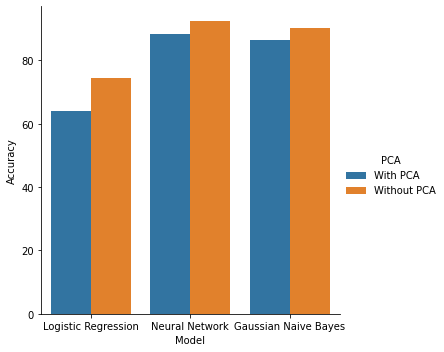

In [121]:
final_df = pd.melt(final_result, id_vars="Model", var_name="PCA", value_name="Accuracy")
sns.factorplot(x='Model', y='Accuracy', hue='PCA', data=final_df, kind='bar')

# Model Tuning

In [37]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled,y_train)

In [74]:
X_train_balanced.shape, y_train_balanced.shape

((17521, 16), (17521,))

In [66]:
nn_with_balanced = NeuralNetwork(epochs = 15, batch_size=100, X=X_train_balanced, y=y_train_balanced,
                                 X_val = X_test_scaled, y_val = y_test)
history_with_balanced = nn_with_balanced.fit()

Epoch 1/15
176/176 [==============================] - 1s 3ms/step - loss: 1.7715 - accuracy: 0.2828 - val_loss: 1.6126 - val_accuracy: 0.3604
Epoch 2/15
176/176 [==============================] - 0s 2ms/step - loss: 1.3595 - accuracy: 0.5705 - val_loss: 1.0633 - val_accuracy: 0.6259
Epoch 3/15
176/176 [==============================] - 0s 2ms/step - loss: 1.0481 - accuracy: 0.6952 - val_loss: 0.8521 - val_accuracy: 0.6895
Epoch 4/15
176/176 [==============================] - 0s 2ms/step - loss: 0.8763 - accuracy: 0.7644 - val_loss: 0.7256 - val_accuracy: 0.7669
Epoch 5/15
176/176 [==============================] - 0s 2ms/step - loss: 0.7442 - accuracy: 0.8232 - val_loss: 0.6269 - val_accuracy: 0.8061
Epoch 6/15
176/176 [==============================] - 0s 2ms/step - loss: 0.6447 - accuracy: 0.8553 - val_loss: 0.5639 - val_accuracy: 0.8286
Epoch 7/15
176/176 [==============================] - 0s 2ms/step - loss: 0.5706 - accuracy: 0.8705 - val_loss: 0.5101 - val_accuracy: 0.8452
Epoch 

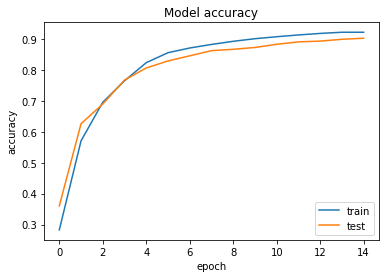

In [67]:
plt.plot(history_with_balanced.history['accuracy'])
plt.plot(history_with_balanced.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

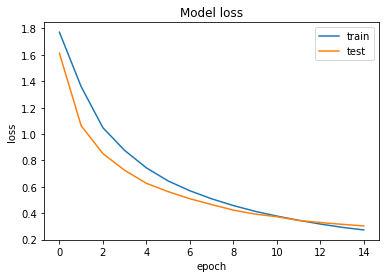

In [68]:
plt.plot(history_with_balanced.history['loss'])
plt.plot(history_with_balanced.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [69]:
y_hat_train = calc_y_hat(nn_with_balanced.predict(X_train_balanced))
y_hat_test = calc_y_hat(nn_with_balanced.predict(X_test_scaled))
y_hat_val = calc_y_hat(nn_with_balanced.predict(X_val_scaled))

64/64 [==============================] - 0s 1ms/step


In [70]:
print(classification_report(y_train_balanced, y_hat_train, target_names=['0','1','2','3','4','5','6']))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      2503
           1       0.99      1.00      0.99      2503
           2       0.92      0.96      0.94      2503
           3       0.89      0.88      0.89      2503
           4       0.92      0.94      0.93      2503
           5       0.93      0.96      0.95      2503
           6       0.85      0.82      0.83      2503

    accuracy                           0.92     17521
   macro avg       0.92      0.92      0.92     17521
weighted avg       0.92      0.92      0.92     17521



In [71]:
print(classification_report(y_val, y_hat_val, target_names=['0','1','2','3','4','5','6']))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92       198
           1       0.95      0.99      0.97        78
           2       0.90      0.95      0.93       239
           3       0.92      0.87      0.89       509
           4       0.91      0.93      0.92       301
           5       0.91      0.95      0.93       323
           6       0.83      0.82      0.83       394

    accuracy                           0.90      2042
   macro avg       0.91      0.92      0.91      2042
weighted avg       0.90      0.90      0.90      2042



## Fit of the Model

In [73]:
from sklearn.metrics import zero_one_loss
print('Training Data Error: '+str(round(zero_one_loss(y_train_balanced, y_hat_train)*100,2))+'%')
print('Test Data Error: '+str(round(zero_one_loss(y_test, y_hat_test)*100,2))+'%')
print('Validation Data Error: '+str(round(zero_one_loss(y_val, y_hat_val)*100,2))+'%')

Training Data Error: 7.64%
Test Data Error: 9.79%
Validation Data Error: 10.09%
